# CLASSIFICATION

**Predicting the value of the point according to very small range of value**

Actually, it's the type $(class)$ of the point more than value

Examples:
- Binary, Ternary, m-ary relations where m doesn't tend to infinite.
- $(yes, no)$ questions: the message is spam or not, sent or not.
- Gender/Sex of Human (Man, Woman, Child), (Male, Female).
- Disease Test Results: Positive, Negative. 

### Tools
- Pandas
- Numpy
- matplotlib

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Training

In [61]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

**Plotting the data training**

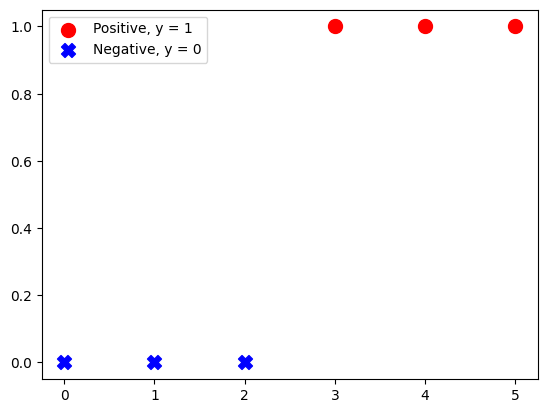

In [62]:
# Splitting the data into positive and negative classes
pos = y_train == 1
neg = y_train == 0

plt.scatter(x_train[pos], y_train[pos] , marker='o', c='red', s=100, label='Positive, y = 1')
plt.scatter(x_train[neg], y_train[neg] , marker='X', c='blue', s=100, label='Negative, y = 0')
plt.legend()


**Let's try to fit the model with linear regression**

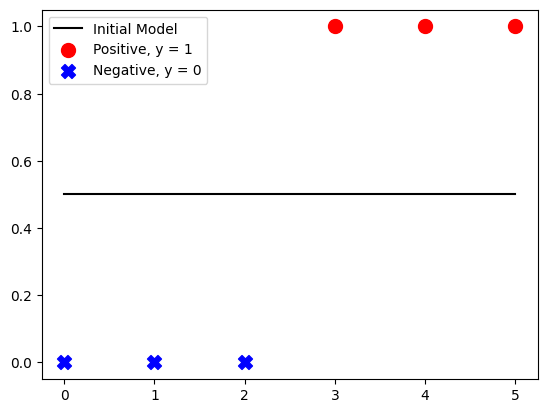

In [63]:
f_wb = np.array([0.5]*x_train.shape[0])
plt.plot(x_train, f_wb, label='Initial Model', c='black')

pos = y_train == 1
neg = y_train == 0

plt.scatter(x_train[pos], y_train[pos] , marker='o', c='red', s=100, label='Positive, y = 1')
plt.scatter(x_train[neg], y_train[neg] , marker='X', c='blue', s=100, label='Negative, y = 0')
plt.legend()

## Sigmoid Function
As Linear Regression is not the best way to cover these points, we use Sigmoid Function to estimate the points.
**Sigmoid Function** : is a exponential function used to map all values between 0 and 1

There is its formula:
$$g(z) = \frac{1}{1 + e^{-z}}$$
`Where z is the imput of the sigmoid function.`

In [64]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

**Here we see that segmoid function cover the two regions**

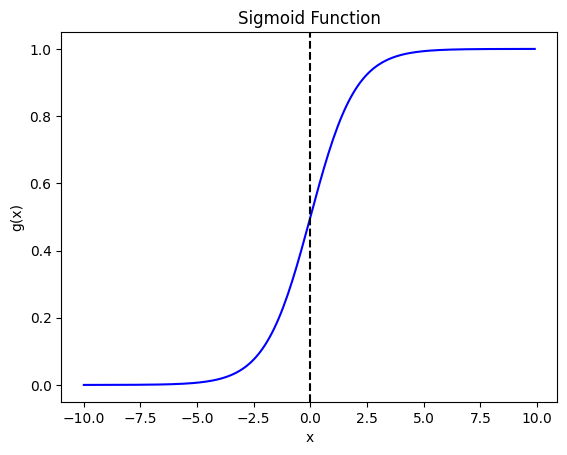

In [65]:
x = np.arange(-10, 10, 0.1)
y = sigmoid_function(x)

plt.plot(x, y, c="b")
plt.axvline(x=0, color='k', linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.show()

## Logistic Regression

**As we see that Linear Regression cannot fit the points and we fit them using Sigmoid Function**

So, we will use sigmoid function to do our model

This is called **Logistics Regression** and here is its formula:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $$ g(z) = \frac{1}{1+e^{-z}} $$


**Let's try it in code**

In [66]:
def logistic_regression(x, w, b):
    return sigmoid_function(w*x + b)

[0.5 0.5 0.5 0.5 0.5 0.5]


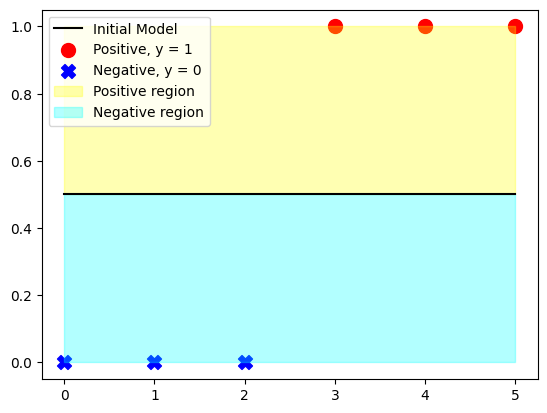

In [67]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

y_pred = logistic_regression(x_train, w_in, b_in)
print(y_pred)

plt.plot(x_train, y_pred, label='Initial Model', c='black')
pos = y_train == 1
neg = y_train == 0

plt.scatter(x_train[pos], y_train[pos] , marker='o', c='red', s=100, label='Positive, y = 1')
plt.scatter(x_train[neg], y_train[neg] , marker='X', c='blue', s=100, label='Negative, y = 0')

plt.fill_between(x_train, y_pred, 1, where=(y_pred >= 0.5), color='yellow', alpha=0.3, label='Positive region')
plt.fill_between(x_train, y_pred, 0, where=(y_pred <= 0.5), color='cyan', alpha=0.3, label='Negative region')
plt.legend()

### cost Function for Logistic Regression
**As any model, logistic regression has cost function that penalize the model and that is a maesure of how well the model is**

**cost Function formula**

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

In [68]:
def cost_function(x_train, y_train, w, b):
    y_pred = logistic_regression(x_train, w, b)
    m = x_train.shape[0]
    cost = 0.
    for i in range(m):
        cost += (y_pred[i] - y_train[i])**2
    return cost/(2*m)

### Loss Function
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

**We use this when dealing with the curves when y = 0 and y = 1 seperately**

To merge them in one formula:
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [69]:
def cost_function_by_loss(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid_function(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost / m
    return cost

**Test the two methods of cost function**

In [70]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])            
w_in = np.array([1,1])
b_in = -3

cost = cost_function_by_loss(x_train, y_train, w_in, b_in)
print(cost)

0.36686678640551745


# Gradient Descent

The Gradient Descent is an iterative algorithm to find the best model parameters w,b to minimize the cost function of the model.

The Gradient Descent Algorithm is as the following: 
    
$$
\begin{align} \;
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline
\end{align}
$$
You need to repeat this until convergence or for number of iterations.

where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4} \\
\end{align}
$$

`where` $f_{w,b}$ is the segmoid function:
$g(z) = \frac{1}{1+e^{-z}}$


We will get Gradient Descent in 3 functions:

- `compute cost`: was implemented in the previous outline (Cost Function).
- `compute gradient` : implements the last 2 equations 4,5.
- `Gradient Descent` : get final parameters w,b from equations 1,2.


In [74]:
def compute_gradient(x, y, w, b):
    # f_wb is the model prediction for each point.
    # y is the target value.
    # x is the input data (training data).
    
    m,n = x.shape   # size of the training data
    
    dw = np.zeros((n,))
    db = 0.0
    
    for i in range(0, m):
        f_i = sigmoid_function(np.dot(x[i], w) + b)
        for j in range(0, n):
            dw[j] += (f_i - y[i]) * x[i,j]
        db += (f_i - y[i])
    dw /= m
    db /= m
    
    return dw, db

#### gradient descent


In [77]:
def gradient_descent(x, y , w_in, b, alpha, num_iterations):
    # x is the input data
    # y is the target value
    # w_in is the initial value of w
    # b is the initial value of b
    # alpha is the learning rate
    # num_iterations is the number of iterations
    
    w = w_in
    
    for i in range(0, num_iterations):
        dw, db = compute_gradient(x, y, w, b)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % ((num_iterations)/10) == 0:
            print(f'Iteration: {i}, Cost: {cost_function(x, y, w, b)}')
            
    return w, b

Let's Test Our Code

In [78]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration: 0, Cost: [0.12349528 0.12432596]
Iteration: 1000, Cost: [0.13699386 0.18062435]
Iteration: 2000, Cost: [0.15190796 0.19719274]
Iteration: 3000, Cost: [0.15732822 0.20470084]
Iteration: 4000, Cost: [0.16006082 0.20920363]
Iteration: 5000, Cost: [0.16168362 0.21229479]
Iteration: 6000, Cost: [0.16274758 0.21459316]
Iteration: 7000, Cost: [0.16349311 0.21639425]
Iteration: 8000, Cost: [0.1640411  0.21785899]
Iteration: 9000, Cost: [0.1644587  0.21908344]

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837
